# W11-H22

1. Using the imported libraries, plot the distribution of three variables of choice for the breast cancer dataset. Discuss the normality of the distribution and explain if the data needs any transformation.

2. Among the variables, what looks like the most defining variable for cancer vs no cancer? How would you observe/test that?

3. What is the relationship between target and mean radius of the tumor? Hint: boxplot

4. Build a logistic regression model of your own using other features in this dataset, such as the mean texture and mean symmetry. 

5. Bonus question: Why should we choose mean or median values for when we replace missing values in a dataset? Or what else can we do to address the missing values in a dataset? (2 points)


1. Using the imported libraries, plot the distribution of three variables of choice for the breast cancer dataset. Discuss the normality of the distribution and explain if the data needs any transformation.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [4]:
from sklearn import datasets
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df = sklearn_to_df(datasets.load_breast_cancer())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

array([[<AxesSubplot:title={'center':'mean radius'}>,
        <AxesSubplot:title={'center':'mean symmetry'}>],
       [<AxesSubplot:title={'center':'area error'}>, <AxesSubplot:>]],
      dtype=object)

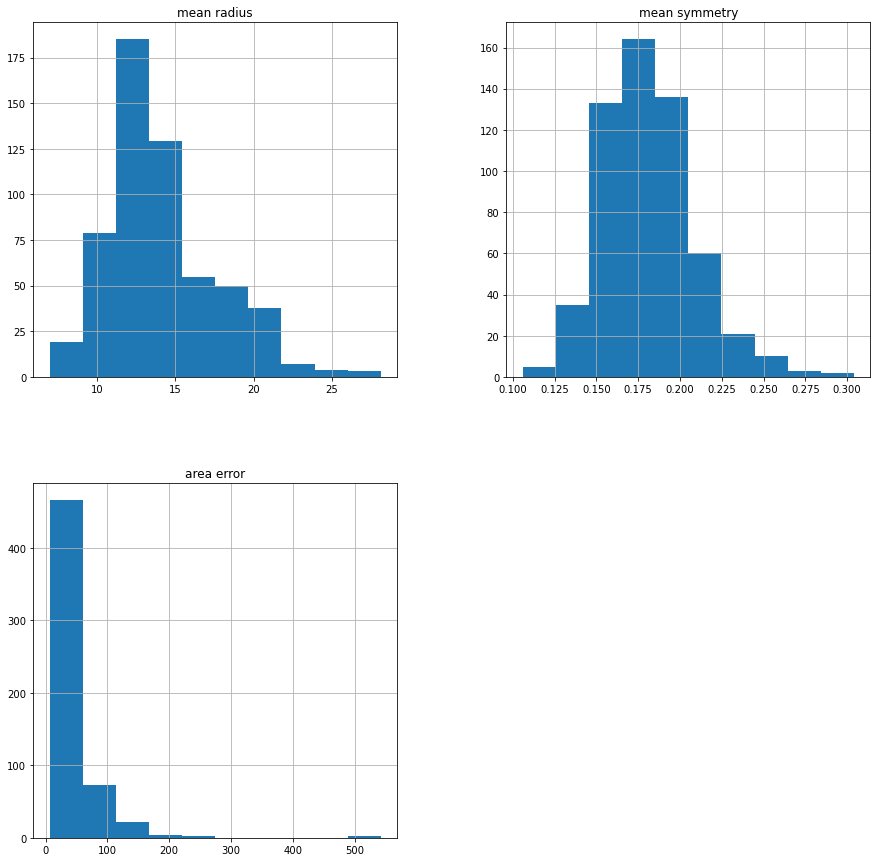

In [11]:
df[['mean radius','mean symmetry','area error']].hist(figsize = (15,15))

All three of the selected features are right skewed. The mean radius and mean symmetry features are slightly skewed right, while the area error feature is skewed heavily right. Since all three of the features are skewed, it would probably be best to replace any NaN values by using the median rather than the mean, but in the specific cases of the mean radius and mean symmetry features, it may be acceptable to use the mean rather than the mean because they are only slighltly skewed. However, for he area error feature, it is necessary to fill any NaN values by median due to its heavily skewed distribution. 

2. Among the variables, what looks like the most defining variable for cancer vs no cancer? How would you observe/test that?


Among the variables in the dataset, the most defining would be the mean radius feature based on the fact that a cancer cell's radius is a key feature to determine its size which is sometimes indicative of whether cancer is present on not. However in order to observe/test that, we would need to visualize whether if there is a high correlation between the target variable and the mean radius variable. By doing an initial visualization, we can drop the features we deem worthless as predictors and focus in on the features that seem to be acting as predictors based off high correlation. Ideally, we want to reduce the features to a minimum to make sure we our model is not losing the underlying trend in the dataset but also not just memorizing the data points present to create a model. 

<ipython-input-12-f44d034e39bb>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


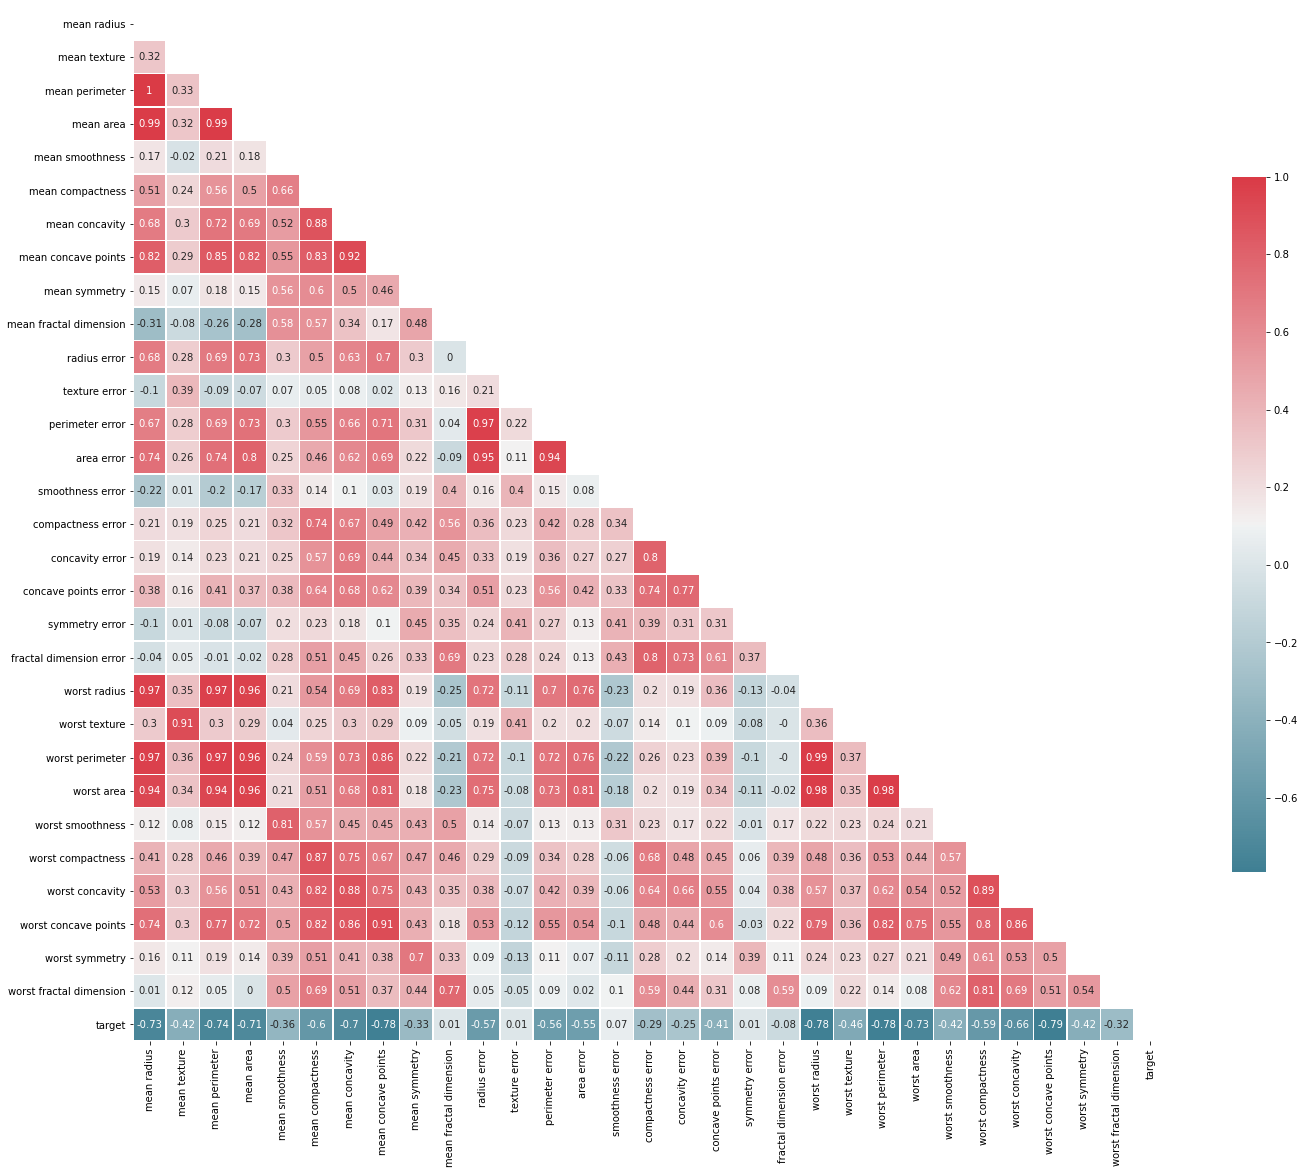

In [12]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [14]:
df = sklearn_to_df(datasets.load_breast_cancer())
df

# first, drop all "worst" columns
cols = ['worst radius', 
        'worst texture', 
        'worst perimeter', 
        'worst area', 
        'worst smoothness', 
        'worst compactness', 
        'worst concavity',
        'worst concave points', 
        'worst symmetry', 
        'worst fractal dimension']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['mean perimeter',
        'perimeter error', 
        'mean area', 
        'area error']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['mean concavity',
        'concavity error', 
        'mean concave points', 
        'concave points error']
df = df.drop(cols, axis=1)

# verify remaining columns
df.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension', 'radius error',
       'texture error', 'smoothness error', 'compactness error',
       'symmetry error', 'fractal dimension error', 'target'],
      dtype='object')

<ipython-input-15-d6ac4485b1df>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


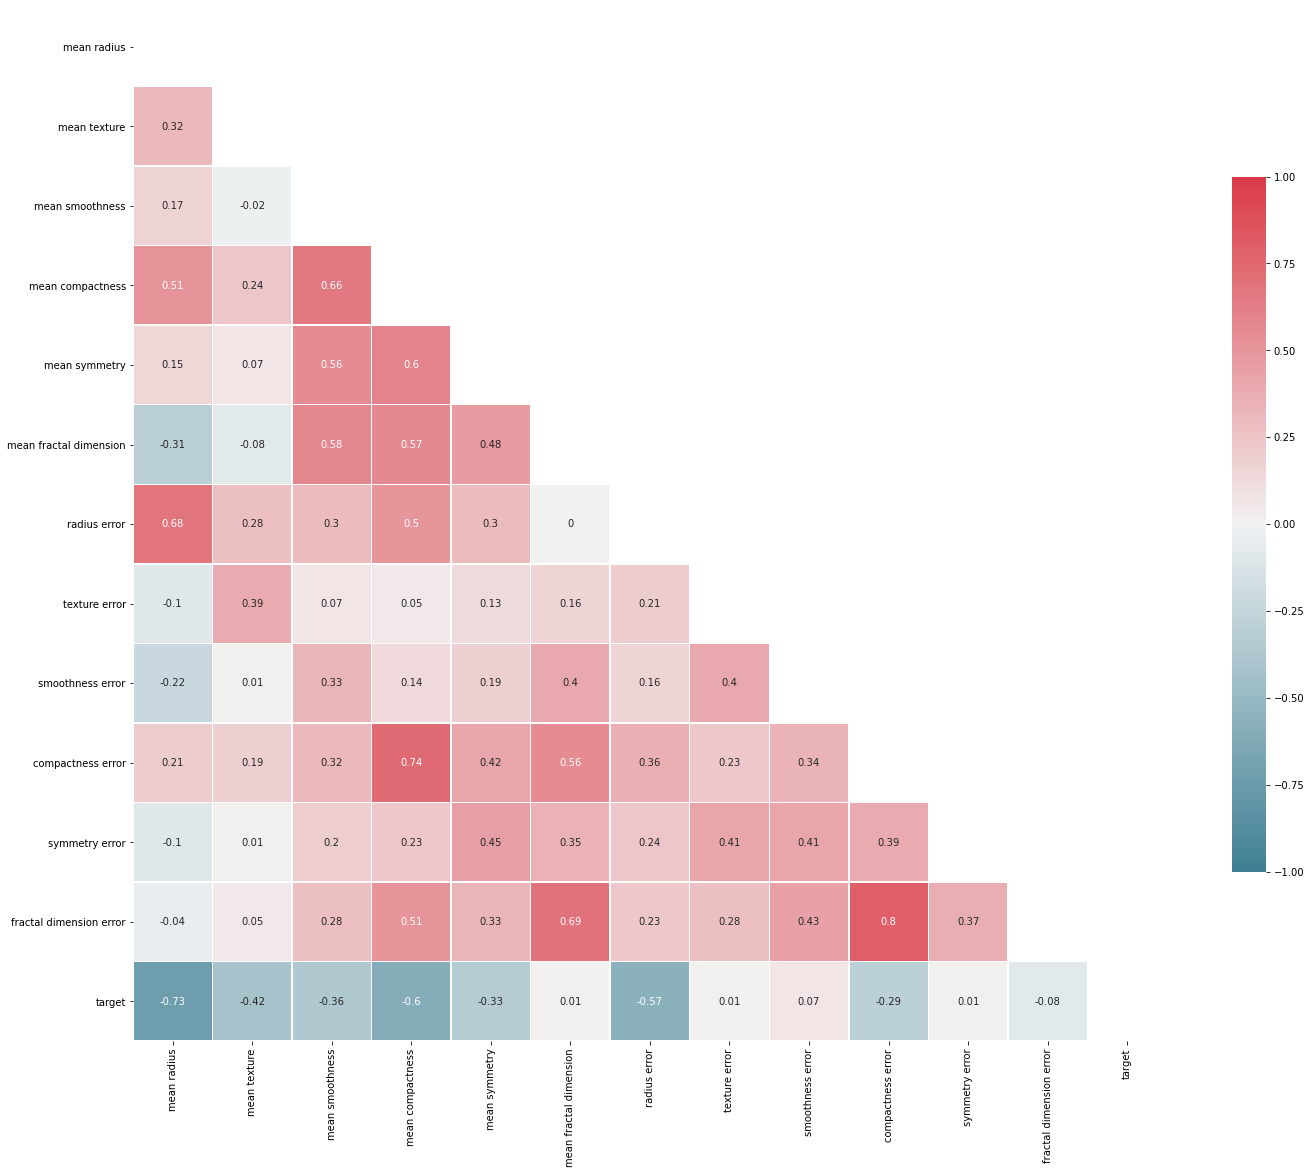

In [15]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

3. What is the relationship between target and mean radius of the tumor? Hint: boxplot


<AxesSubplot:xlabel='target', ylabel='mean radius'>

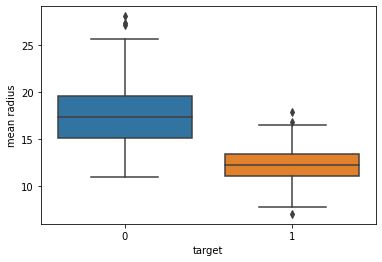

In [17]:
import seaborn as sns
sns.boxplot(data=df,x='target',y='mean radius')

From the boxplot above, we see that in general, benign tumors seem to have a larger mean radius than that of malignant tumors. 

4. Build a logistic regression model of your own using other features in this dataset, such as the mean texture and mean symmetry. 



In [29]:
X_train, X_test, y_train, y_test = train_test_split(df[['mean texture']], df['target'], random_state=2)
clf = LogisticRegression()
clf.fit(X_train, y_train)

In [31]:
score = clf.score(X_test, y_test)
print(('test dataset accuracy:',score)

0.6993006993006993


In [32]:
score_train = clf.score(X_train, y_train)
print('training dataset accuracy: ', score_train)

training dataset accuracy:  0.6948356807511737


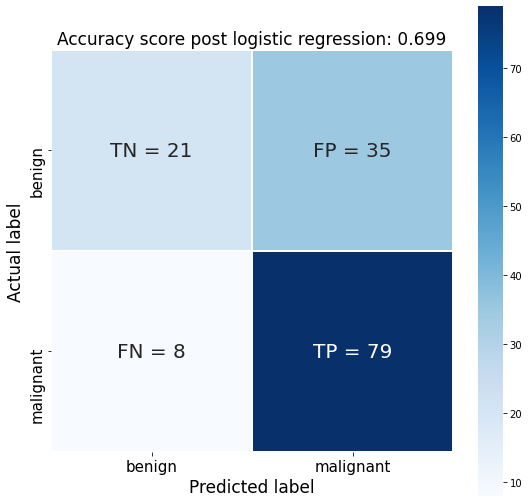

In [33]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))
modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['benign', 'malignant'],
            yticklabels = ['benign', 'malignant'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy score post logistic regression: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df[['mean symmetry']], df['target'], random_state=2)
clf = LogisticRegression()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('test dataset accuracy:',score)
score_train = clf.score(X_train, y_train)
print('training dataset accuracy: ', score_train)

test dataset accuracy: 0.6083916083916084
training dataset accuracy:  0.6338028169014085


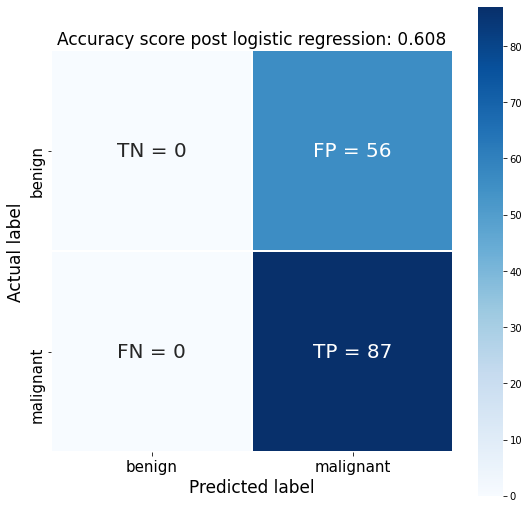

In [35]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))
modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['benign', 'malignant'],
            yticklabels = ['benign', 'malignant'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy score post logistic regression: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

test dataset accuracy: 0.6993006993006993
training dataset accuracy:  0.6948356807511737


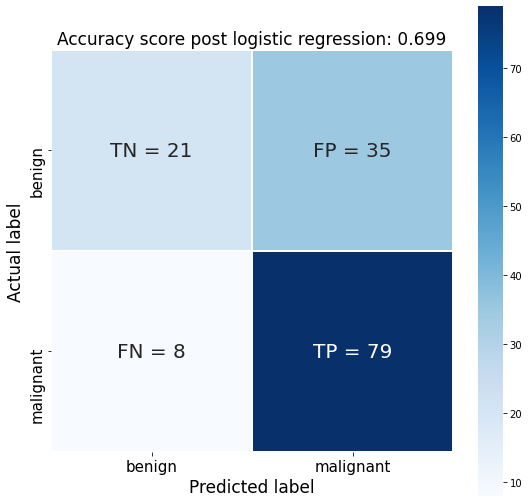

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df[['mean symmetry','mean texture']], df['target'], random_state=2)
clf = LogisticRegression()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('test dataset accuracy:',score)
score_train = clf.score(X_train, y_train)
print('training dataset accuracy: ', score_train)
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))
modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['benign', 'malignant'],
            yticklabels = ['benign', 'malignant'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy score post logistic regression: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

From the two models created above, it seems that the mean texture acts a better predictor than the mean symmetry as it has a higher accuracy score for both the training and test. And when we include both features together in the model, the accuracy scores come out to be nearly the same as when we used mean texture as the sole feature. The major reason as to why mean symmetry model has a lower accuracy score is due to its lacking of True negatives and False Negatives, causing the model to hard harder time to classify the mean symmetry feature as cancer positive or negative. 

5. Bonus question: Why should we choose mean or median values for when we replace missing values in a dataset? Or what else can we do to address the missing values in a dataset? (2 points)

We choose mean or median values to replace missing values in a dataset, purely out of a need for these missing values, as in many cases, many variables that we want to see the full effect of as a predictor are missing values due to various circumstances. We choose to use generally the mean or median as those will probably be a good estimate of what the missing values could be as they are representative of the trend of the feature we are looking at. However, in order to decide whether to use the median or mean to impute the missing data, we need to look at the central tendency of the data via boxplots or distribution plots like histograms. If the variable is skewed, meaning there are a large number of outliers in the data, then we need to impute using median values rather than mean values as the mean of a variable is significantly affected by outliers whicha are causing the skewedness. However, this is not the only option, as we must also take into account whether the dataset is numerical or categorical. If a variable is skewed and numerical, its best to probably used the median. If the dataset is categorical and skewed, then we can actually impute usign the mode as there are no median values in categorical data. If the dataset is numerical and symmetrical, then by default we use the mean. There are other ways to addres missing values in a dataset besides using mean, median or mode, such as imputing a constant value that is agreed upon, or even just removing rows that are filled with missing values. The latter method is a bit severe but sometimes necessary as if your variables are missing too much data, then its not very feasible to impute values as you probably do not have enough data to gather the true trends of the variables. 